<a href="https://colab.research.google.com/github/VincentCloud/COMP550-final-project/blob/main/hypothesis02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/VincentCloud/COMP550-final-project.git

Cloning into 'COMP550-final-project'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 54 (delta 16), reused 45 (delta 9), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [2]:
% cd /content/COMP550-final-project/

/content/COMP550-final-project


# Load the Dataset and Preprocess



In [3]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from nltk.corpus import stopwords
from nltk import RegexpTokenizer,word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

import matplotlib.pyplot as plt
from statistics import median

In [4]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from nltk.corpus import stopwords
from nltk import RegexpTokenizer,word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

samelength = False # If true, make critic and audience dataframe same length by dropping some critic data

tokenizor_decision ="RegexpTokenizer"   #choose between RegexpTokenizer and word_tokenize
preprocess_decision = ["","porter_stemmer","","snowball_stemmer"] #choose from "stopwords","porter_stemmer","snowball_stemmer","lemmatizer"
feature_extraction_decision = "TfidfVectorizer"    #choose between CountVectorizer and TfidfVectorizer




"""
    Read data from files
"""
def getData():

    df = pd.read_csv('./data/dataset.csv')
    #remove the nan value
    df = df.dropna()
    
    c_df = df.loc[df['sources'] == 'critics']
    a_df = df.loc[df['sources'] == 'audience']

    if samelength:
        #make two dataframe same length
        c_df = c_df.iloc[:len(a_df)]

    return c_df,a_df,df

"""
    Data preprocessing
"""

def preprocessing(line):
     
     processed_line = line
    
     if tokenizor_decision =="word_tokenize":
         processed_line=word_tokenize(processed_line)
    
     if tokenizor_decision =="RegexpTokenizer":
         tokenizer = RegexpTokenizer(r'\w+')
         processed_line=tokenizer.tokenize(processed_line)
    
     if "snowball_stemmer" in preprocess_decision:
         stemmer=SnowballStemmer('english')
         processed_line=[stemmer.stem(word) for word in processed_line]
         
     if "porter_stemmer" in preprocess_decision:
        stemmer=PorterStemmer()
        processed_line=[stemmer.stem(word) for word in processed_line]
        
     if "stopwords" in preprocess_decision:
        stop_words = stopwords.words('english')
        processed_line= [word for word in processed_line if  word not in stop_words]
        
     if "lemmatizer" in preprocess_decision:
        lemmatizer=WordNetLemmatizer()
        processed_line=[lemmatizer.lemmatize(word) for word in processed_line]
          
     return processed_line

"""
Data split and feature extraction
"""


def feature_extraction(X,Y):
    x_train, x_val,y_train,y_val = model_selection.train_test_split(X,Y,test_size=0.2,random_state=10)
    x_val, x_test, y_val, y_test = model_selection.train_test_split(x_val,y_val,test_size=0.5,random_state=10)
    
    
    if feature_extraction_decision == "CountVectorizer":
        vect =CountVectorizer(min_df=2)
        
    if feature_extraction_decision == "TfidfVectorizer":
        vect =TfidfVectorizer(min_df=2)
        
    vect.fit(x_train)
    x_train_vect = vect.transform(x_train)
    x_val_vect=vect.transform(x_val)
    x_test_vect=vect.transform(x_test)
    
    return  x_train_vect, x_val_vect,x_test_vect,y_train,y_val,y_test



def get_prediction(data):
    X = []
    Y = []
    review = data['review_texts'].tolist()
    rating = data['ratings_binary'].tolist();
    
    #data preprocessing
    
    for line in review:
    
        processed_line=preprocessing(line)
        processed_line=[re.sub('[0-9+]','',word) for word in processed_line]
        processed_line=' '.join(processed_line)
        X.append(processed_line)
    
    
    Y = rating
    
    print("size of features: ",len(X))
    print("size of labels: ",len(Y))
    
    #feature extraction
    x_train_vect, x_val_vect,x_test_vect,y_train,y_val,y_test = feature_extraction(X,Y)
    
    
    #feed data into model
    LR =LogisticRegression(C=1.2,random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=300)
    LR.fit(x_train_vect, y_train)
    accuracy=LR.score(x_val_vect,y_val)
    print(" accuracy=", accuracy)

critics_data, audience_data, general_data= getData()


In [5]:
critics_data = critics_data.drop('Unnamed: 0', 1)
audience_data = audience_data.drop('Unnamed: 0', 1)
general_data = general_data.drop('Unnamed: 0', 1)

In [6]:
# def preprocess_data(df):
#   review = df['review_texts']
#   for i, line in enumerate(review):

#     processed_line=preprocessing(line)
#     processed_line=[re.sub('[0-9+]','',word) for word in processed_line]
#     processed_line=' '.join(processed_line)
#     review[i] = processed_line
#   df['review_texts'] = review
#   return df

In [7]:
# clean_critics_data = preprocess_data(critics_data.copy())
# clean_audience_data = preprocess_data(audience_data)
# clean_general_data = preprocess_data(general_data)

In [8]:
def add_length_distribution(df, title):
  review_length = [len(review.split()) for review in df['review_texts']]
  df['review_length'] = review_length
  print(review_length)
  fig = plt.figure()
  plt.hist(review_length, edgecolor = 'black', bins=10, range=[0, 100], density=True)
  fig.suptitle(title)
  plt.xlabel('review length')
  plt.ylabel('percentage')
  print(f'mean length of the view text: {sum(review_length)/len(review_length)}')
  print(f'median length of the review text: {median(review_length)}')
  return df

In [9]:
critics_data.head()

,movie_ids,sources,ratings,ratings_binary,review_texts
0,fear_street_part_one_1994,critics,fresh,p,FEAR STREET PART ONE: 1994 plays on horror tro...
1,fear_street_part_one_1994,critics,fresh,p,"A clever-enough twist on old slasher tropes, f..."
2,fear_street_part_one_1994,critics,fresh,p,"Truthfully, it's kind of sad that a film that ..."
3,fear_street_part_one_1994,critics,fresh,p,It looks like director Janiak sat the art dire...
4,fear_street_part_one_1994,critics,fresh,p,...the absence of wholeheartedly compelling pr...


[21, 31, 39, 29, 16, 24, 14, 24, 23, 20, 26, 26, 8, 29, 21, 17, 27, 25, 22, 10, 23, 18, 28, 27, 24, 10, 27, 13, 6, 22, 21, 20, 41, 15, 22, 16, 10, 30, 27, 32, 18, 11, 27, 17, 32, 35, 22, 34, 37, 13, 20, 29, 39, 29, 34, 11, 26, 21, 28, 19, 20, 43, 22, 13, 23, 29, 18, 31, 27, 38, 26, 25, 27, 26, 25, 8, 6, 27, 23, 12, 24, 11, 14, 10, 31, 39, 26, 40, 29, 32, 24, 14, 26, 46, 37, 11, 33, 8, 37, 15, 21, 23, 37, 10, 12, 22, 11, 37, 24, 28, 21, 25, 8, 17, 29, 24, 11, 32, 16, 10, 45, 21, 31, 26, 14, 15, 23, 8, 25, 21, 32, 28, 27, 22, 6, 27, 11, 19, 38, 5, 10, 19, 11, 28, 34, 6, 29, 33, 5, 29, 37, 21, 20, 31, 32, 38, 30, 32, 27, 40, 29, 13, 11, 25, 5, 16, 29, 17, 38, 47, 21, 13, 4, 31, 20, 18, 39, 27, 38, 16, 12, 14, 7, 18, 40, 23, 42, 25, 27, 21, 5, 19, 15, 21, 20, 23, 21, 28, 18, 15, 19, 12, 25, 21, 31, 13, 28, 25, 30, 22, 37, 30, 23, 15, 16, 16, 16, 30, 24, 22, 8, 18, 28, 18, 25, 33, 25, 18, 24, 37, 28, 17, 16, 14, 32, 27, 16, 14, 39, 37, 19, 31, 12, 8, 22, 27, 31, 26, 27, 27, 16, 25, 32, 26, 

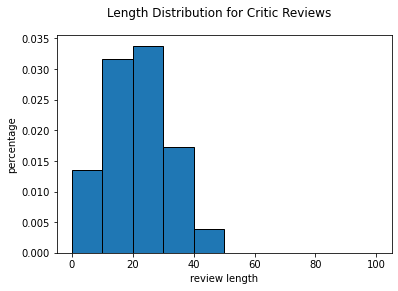

In [11]:
critics_data = add_length_distribution(critics_data, 'Length Distribution for Critic Reviews')

[3, 15, 34, 61, 6, 19, 11, 6, 19, 30, 179, 52, 64, 621, 11, 50, 8, 57, 38, 42, 36, 28, 11, 33, 59, 34, 58, 66, 7, 21, 4, 40, 8, 15, 14, 109, 36, 15, 22, 82, 24, 35, 73, 67, 68, 11, 5, 30, 77, 26, 13, 40, 238, 196, 4, 47, 15, 24, 34, 58, 359, 30, 4, 36, 38, 102, 67, 13, 16, 179, 29, 4, 13, 43, 11, 26, 35, 11, 29, 14, 18, 48, 31, 53, 103, 8, 11, 10, 21, 7, 90, 10, 26, 13, 19, 14, 13, 56, 10, 17, 28, 19, 4, 34, 10, 97, 21, 67, 3, 5, 21, 6, 72, 115, 25, 41, 39, 36, 67, 58, 8, 13, 22, 11, 34, 23, 6, 11, 46, 50, 26, 80, 9, 5, 37, 188, 9, 24, 137, 12, 38, 13, 50, 17, 11, 15, 26, 191, 257, 197, 204, 47, 10, 17, 31, 15, 6, 3, 12, 57, 50, 21, 643, 26, 6, 110, 17, 23, 71, 97, 31, 14, 24, 9, 13, 116, 55, 16, 168, 17, 64, 4, 55, 108, 49, 19, 26, 39, 15, 91, 37, 6, 69, 7, 9, 29, 79, 68, 73, 159, 25, 237, 5, 31, 22, 8, 48, 91, 127, 6, 48, 34, 16, 68, 17, 35, 53, 6, 46, 23, 40, 7, 15, 6, 268, 47, 73, 410, 13, 28, 21, 8, 100, 19, 12, 214, 14, 51, 14, 102, 414, 103, 16, 13, 56, 32, 19, 23, 59, 13, 35, 3

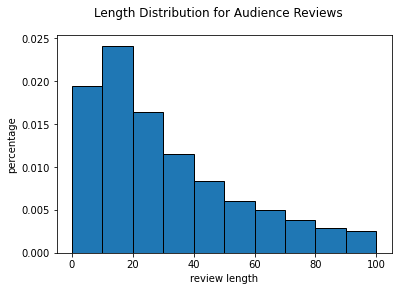

In [13]:
clean_audience_data = add_length_distribution(audience_data, 'Length Distribution for Audience Reviews')

[21, 31, 39, 29, 16, 24, 14, 24, 23, 20, 26, 26, 8, 29, 21, 17, 27, 25, 22, 10, 3, 15, 34, 61, 6, 19, 11, 6, 19, 30, 23, 18, 28, 27, 24, 10, 27, 13, 6, 22, 21, 20, 41, 15, 22, 16, 10, 30, 27, 32, 179, 52, 64, 621, 11, 50, 8, 57, 38, 42, 18, 11, 27, 17, 32, 35, 22, 34, 37, 13, 20, 29, 39, 29, 34, 11, 26, 21, 28, 19, 36, 28, 11, 33, 59, 34, 58, 66, 7, 21, 20, 43, 22, 13, 23, 29, 18, 31, 27, 38, 26, 25, 27, 26, 25, 8, 6, 27, 23, 12, 4, 40, 8, 15, 14, 109, 36, 15, 22, 82, 24, 11, 14, 10, 31, 39, 26, 40, 29, 32, 24, 14, 26, 46, 37, 11, 33, 8, 37, 15, 24, 35, 73, 67, 68, 11, 5, 30, 77, 26, 21, 23, 37, 10, 12, 22, 11, 37, 24, 28, 21, 25, 8, 17, 29, 24, 11, 32, 16, 10, 13, 40, 238, 196, 4, 47, 15, 24, 34, 58, 45, 21, 31, 26, 14, 15, 23, 8, 25, 21, 32, 28, 27, 22, 6, 27, 11, 19, 38, 5, 359, 30, 4, 36, 38, 102, 67, 13, 16, 179, 10, 19, 11, 28, 34, 6, 29, 33, 5, 29, 37, 21, 20, 31, 32, 38, 30, 32, 27, 40, 29, 4, 13, 43, 11, 26, 35, 11, 29, 14, 29, 13, 11, 25, 5, 16, 29, 17, 38, 47, 21, 13, 4, 31,

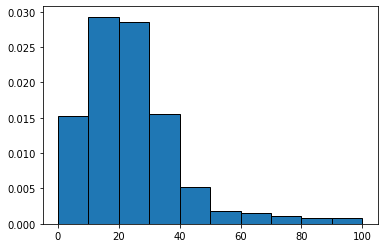

In [ ]:
clean_general_data = add_length_distribution(general_data)

# Separate the Data According Median Length

In [ ]:
# We think the reason of the performance could be that the sentiment analysis model's performance is determined by the length of the text
# Therefore, we separate the data from each group by its median length to see if the performance increases

longer_critics_data = critics_data[critics_data['review_length'] >= 22]
shorter_critics_data = critics_data[critics_data['review_length'] < 22]

longer_audience_data = audience_data[audience_data['review_length'] >= 29]
shorter_audience_data = audience_data[audience_data['review_length'] < 29]

In [ ]:
print("longer critics result:")
get_prediction(longer_critics_data)

print("shorter critics result:")
get_prediction(shorter_critics_data)

print("longer audience result:")
get_prediction(longer_audience_data)

print("shorter audience result:")
get_prediction(shorter_audience_data)

# print("audience result:")
# get_prediction(audience_data)

longer critics result:
size of features:  4275
size of labels:  4275
 accuracy= 0.8079625292740047
shorter critics result:
size of features:  4631
size of labels:  4631
 accuracy= 0.7451403887688985
longer audience result:
size of features:  2265
size of labels:  2265
 accuracy= 0.8362831858407079
shorter audience result:
size of features:  2268
size of labels:  2268
 accuracy= 0.7973568281938326


In [ ]:
print("critics result:")
get_prediction(critics_data.sample(frac=0.5, random_state=13))

critics result:
size of features:  4453
size of labels:  4453
 accuracy= 0.7662921348314606


In [ ]:
print("audience result:")
get_prediction(audience_data.sample(frac=0.5, random_state=1))

audience result:
size of features:  2266
size of labels:  2266
 accuracy= 0.8281938325991189


In [ ]:
longer_audience_data.to_csv('/content/drive/MyDrive/dataset/longer_audience.csv')
shorter_audience_data.to_csv('/content/drive/MyDrive/dataset/shorter_audience.csv')

longer_critics_data.to_csv('/content/drive/MyDrive/dataset/longer_critics.csv')
shorter_critics_data.to_csv('/content/drive/MyDrive/dataset/shorter_critics.csv')

critics_data.to_csv('/content/drive/MyDrive/dataset/critics_half.csv')
audience_data.to_csv('/content/drive/MyDrive/dataset/audience_half.csv')

In [ ]:
longer_audience_data.head()

,movie_ids,sources,ratings,ratings_binary,review_texts,review_length
22,fear_street_part_one_1994,audience,2.5,n,Such a lead on opening the movie with maya haw...,34
23,fear_street_part_one_1994,audience,3.0,p,Very good idea but not well made. Would not wa...,61
29,fear_street_part_one_1994,audience,3.0,p,"Nada revolucionário, mas divertido. Com boas r...",30
50,mass_2021,audience,4.5,p,"Rating: A\n\n""Mass is undoubtedly one of the m...",179
51,mass_2021,audience,4.5,p,Somewhere between In The Bedroom and We Need T...,52
